In [2]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.transforms import v2

from PIL import Image

import matplotlib.pyplot as plt

from torchinfo import summary

In [3]:
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True
)
test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True
)

print(len(train_dataset), len(test_dataset))

60000 10000


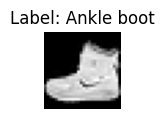

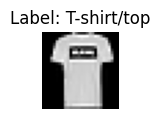

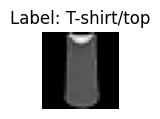

In [4]:
def visualize_data(image, label):
	class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
	plt.figure(figsize=(1, 1))
	plt.imshow(image, cmap='gray')
	plt.title(f'Label: {class_names[label]}')
	plt.axis('off')
	plt.show()

for i in range(3):
	image, label = train_dataset[i]
	visualize_data(image, label)

In [5]:
image, label = train_dataset[0]
print(np.array(image))
print(np.array(image).shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
transform = v2.Compose([
	v2.ToTensor(),
    v2.ToDtype(torch.float32, scale=True)
])

/Users/kimjaeyong/Documents/study/toy_projects/codeit/myvenv/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [7]:
train_dataset = datasets.FashionMNIST(
	root='./fashion_mnist',
	train=True,
	download=True,
	transform=transform
)
test_dataset = datasets.FashionMNIST(
	root='./fashion_mnist',
	train=False,
	download=True,
	transform=transform
)

print(len(train_dataset), len(test_dataset))

60000 10000


In [8]:
image, label = train_dataset[0]
print(np.array(image))

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [9]:
train_loader = DataLoader(
	train_dataset,
	batch_size=128,
	shuffle=True,
	drop_last=True
)
test_loader = DataLoader(
	test_dataset,
	batch_size=128,
	shuffle=False,
)

In [10]:
class BasicAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
			nn.Linear(28 * 28, 128),
			nn.ReLU(),
			nn.Linear(128, 64),
			nn.ReLU()
		)
        self.decoder = nn.Sequential(
			nn.Linear(64, 128),
			nn.ReLU(),
			nn.Linear(128, 28 * 28),
			nn.Sigmoid()
		)
        
    def forward(self, x):
        encoded = self.encoder(x)
        x = self.decoder(encoded)
        return x

In [11]:
model = BasicAutoencoder()
loss_fn = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr=0.001)

In [12]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device: {device}')

model.to(device)

Using device: mps


BasicAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [13]:
epochs = 10
for epoch in range(epochs):
	model.train()
	total_loss = 0.0
	for images, _ in train_loader:
		opt.zero_grad()
		images = images.view(images.size(0), -1).to(device)

		outputs = model(images)
		loss = loss_fn(outputs, images)
		loss.backward()
		opt.step()

		total_loss += loss.item()
		
	print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

Epoch [1/10], Loss: 0.0383
Epoch [2/10], Loss: 0.0202
Epoch [3/10], Loss: 0.0175
Epoch [4/10], Loss: 0.0157
Epoch [5/10], Loss: 0.0145
Epoch [6/10], Loss: 0.0137
Epoch [7/10], Loss: 0.0131
Epoch [8/10], Loss: 0.0126
Epoch [9/10], Loss: 0.0122
Epoch [10/10], Loss: 0.0118


In [14]:
model.eval()
with torch.no_grad():
	for images, _ in test_loader:
		images = images.view(images.size(0), -1).to(device)
		outputs = model(images)

		break

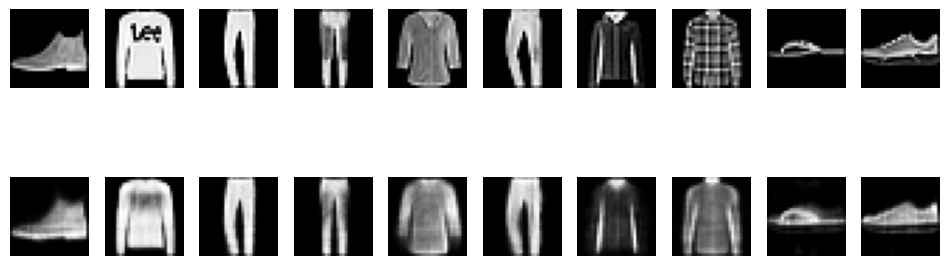

In [15]:
images = images.view(-1, 28, 28)
outputs = outputs.view(-1, 28, 28)

fig, axes = plt.subplots(2, 10, figsize=(12, 4))
for i in range(10):
	axes[0, i].imshow(images[i].cpu(), cmap='gray')
	axes[0, i].axis('off')
	axes[1, i].imshow(outputs[i].cpu(), cmap='gray')
	axes[1, i].axis('off')

In [16]:
class CNNAutoencoder(nn.Module):
	def __init__(self):
		super().__init__()
		self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # latent vector dimension = 3
        )
		self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
		# self.encoder = nn.Sequential( # input size: (b, 1, 28, 28)
		# 	nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), # output size: (b, 32, 28, 28)
		# 	nn.ReLU(),
		# 	nn.MaxPool2d(kernel_size=2, stride=2), # output size: (b, 32, 14, 14)
		# 	nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # output size: (b, 64, 14, 14)
		# 	nn.ReLU(),
		# 	nn.MaxPool2d(kernel_size=2, stride=2) # output size: (b, 64, 7, 7)
		# )
		# self.decoder = nn.Sequential(
		# 	nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2), # output size: (b, 32, 14, 14)
		# 	nn.ReLU(),
		# 	nn.ConvTranspose2d(32, 1, kernel_size=2, stride=2), # output size: (b, 1, 28, 28)
		# 	nn.Sigmoid()
		# )

	def forward(self, x):
		encoded = self.encoder(x)
		x = self.decoder(encoded)
		return x
	
	def encode(self, x):
		return self.encoder(x)	


In [17]:
model = CNNAutoencoder().to(device)
loss_fn = nn.MSELoss()
opt = optim.Adam(model.parameters(), lr=0.001)

model

CNNAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [18]:
epochs = 10
for epoch in range(epochs):
	model.train()
	total_loss = 0.0
	for images, _ in train_loader:
		opt.zero_grad()
		# images = images.to(device)
		images = images.view(images.size(0), -1).to(device)

		outputs = model(images)
		loss = loss_fn(outputs, images)
		loss.backward()
		opt.step()

		total_loss += loss.item()
		
	print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}')

Epoch [1/10], Loss: 0.0532
Epoch [2/10], Loss: 0.0315
Epoch [3/10], Loss: 0.0280
Epoch [4/10], Loss: 0.0264
Epoch [5/10], Loss: 0.0257
Epoch [6/10], Loss: 0.0252
Epoch [7/10], Loss: 0.0248
Epoch [8/10], Loss: 0.0245
Epoch [9/10], Loss: 0.0241
Epoch [10/10], Loss: 0.0239


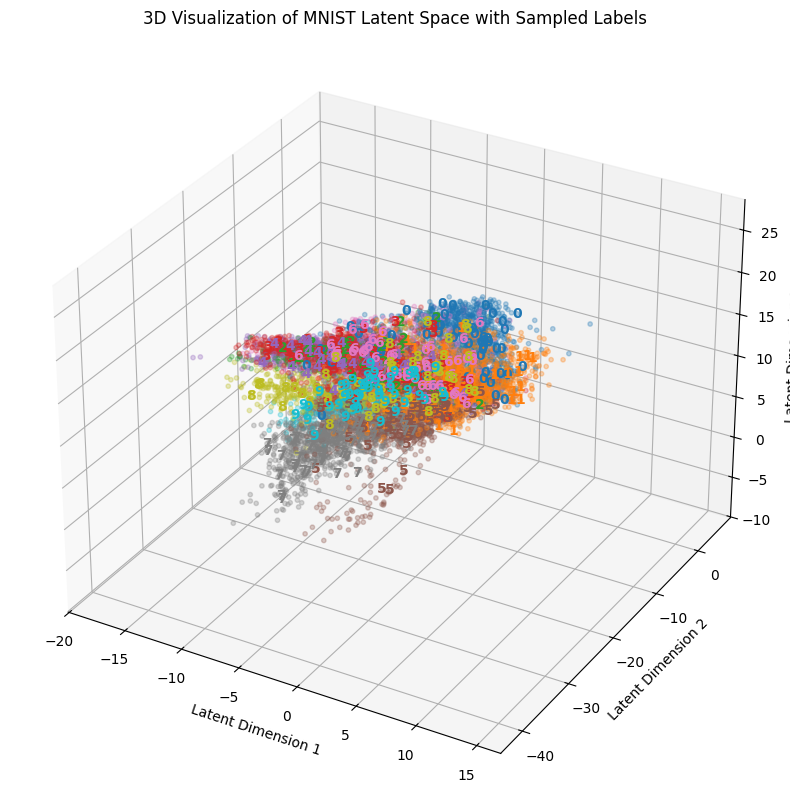

In [19]:
# latent 공간 시각화를 위한 데이터 추출
model.eval()
all_latents = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1).to(device)
        # latent 벡터만 추출 (model.encode() 사용)
        latent = model.encode(images)
        all_latents.append(latent.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

all_latents = np.concatenate(all_latents, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 3D 시각화: 전체 분포와 일부 샘플에 텍스트 어노테이션 추가
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 전체 latent 벡터에 대해 scatter plot (작은 크기와 낮은 불투명도로 분포 확인)
scatter = ax.scatter(all_latents[:, 0], all_latents[:, 1], all_latents[:, 2],
                     c=all_labels, cmap='tab10', s=10, alpha=0.3)

# 각 digit별로 일부 포인트만 선택하여 텍스트 어노테이션 추가
for digit in range(10):
    # 현재 클래스(digit)에 해당하는 인덱스 찾기
    indices = np.where(all_labels == digit)[0]
    # 전체 포인트 중 최대 50개를 무작위로 샘플링 (포인트가 50개 미만인 경우 전체 사용)
    sample_indices = np.random.choice(indices, size=min(50, len(indices)), replace=False)

    for idx in sample_indices:
        x, y, z = all_latents[idx, 0], all_latents[idx, 1], all_latents[idx, 2]
        ax.text(x, y, z, str(digit),
                color=plt.cm.tab10(digit),
                fontsize=10,
                fontweight='bold',
                ha='center', va='center')

ax.set_xlabel("Latent Dimension 1")
ax.set_ylabel("Latent Dimension 2")
ax.set_zlabel("Latent Dimension 3")
plt.title("3D Visualization of MNIST Latent Space with Sampled Labels")
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# all_latents와 all_labels는 이전 코드에서 추출한 NumPy 배열이어야 합니다.
# 예시)
# all_latents.shape = (N, 3)
# all_labels.shape = (N,)

# 각 숫자(0~9)에 대한 색상 리스트 (Plotly 기본 색상 사용)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

fig = go.Figure()

for digit in np.unique(all_labels):
    # 현재 digit에 해당하는 인덱스 찾기
    indices = np.where(all_labels == digit)[0]
    # 각 클래스에서 최대 50개의 샘플 선택 (샘플이 적으면 모두 선택)
    sample_indices = np.random.choice(indices, size=min(50, len(indices)), replace=False)

    fig.add_trace(go.Scatter3d(
        x=all_latents[sample_indices, 0],
        y=all_latents[sample_indices, 1],
        z=all_latents[sample_indices, 2],
        mode='text',  # 마커 없이 텍스트만 표시
        text=[str(digit)] * len(sample_indices),
        textposition='middle center',
        textfont=dict(color=colors[int(digit)], size=12),
        name=f"Digit {digit}"
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Latent Dimension 1',
        yaxis_title='Latent Dimension 2',
        zaxis_title='Latent Dimension 3'
    ),
    width=800,
    margin=dict(r=20, l=10, b=10, t=10),
    title="3D Visualization of MNIST Latent Space (Text Labels)"
)

fig.show()
